# CLEANING AND DESCRIPTIVE DATA ANALYSIS

In [35]:
# LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# URL
total_data = pd.read_csv(r"..\data\raw\obesity_data.csv")
# Example of the dataset
total_data.head(5)

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


1. General information about the dataset, including its shape, column names, presence of null entries, and data types:

In [36]:
# general info and shape
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


The dataset has one thousand rows, seven columns, six variables and one target. Also, it has no null values.

2. Information about measures of central tendency and dispersion:

In [37]:
# General description and data values 
total_data.describe().T

'Age',
'Height',
'Weight',
'BMI',
'PhysicalActivityLevel'

'PhysicalActivityLevel'

3. Check for duplicate values:

In [38]:
# Duplicates
total_data.duplicated().sum()

0

The dataset has not duplicates.

4. Histogram of data distribution for each variable:

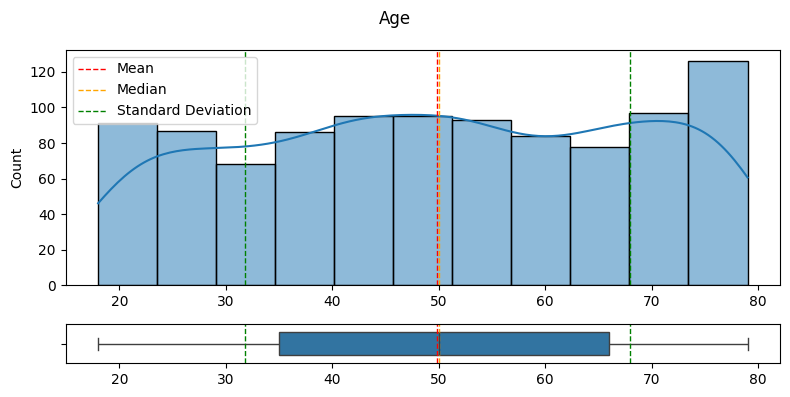

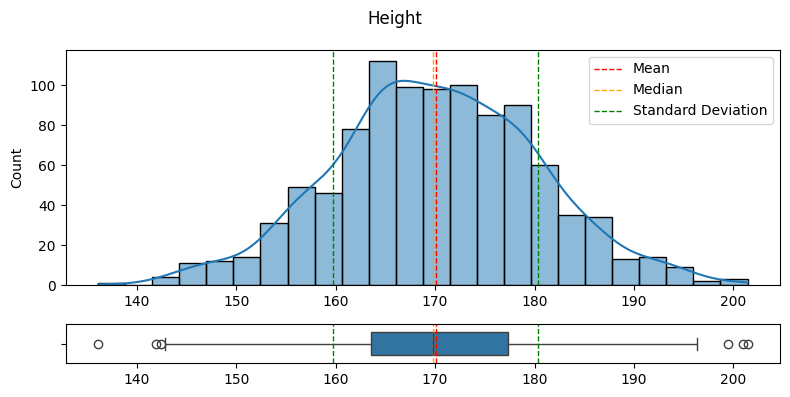

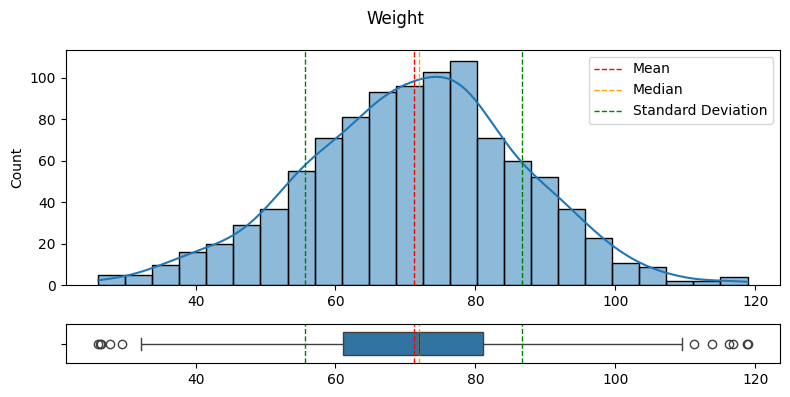

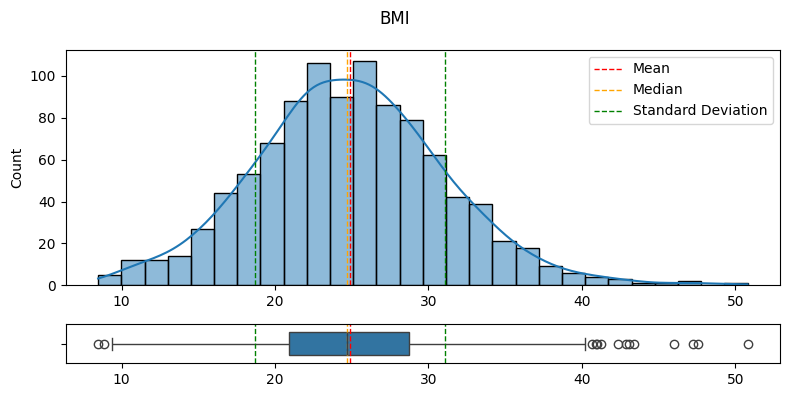

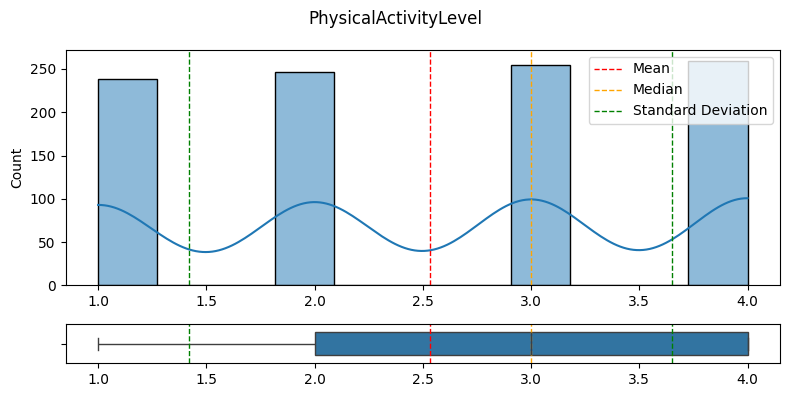

In [39]:
# Plot numerical variables to see values distribution (mean, median, std, outliers)
def plot_numerical_data(dataframe):
    numerical_columns = dataframe[[
        'Age',
        'Height',
        'Weight',
        'BMI',
        'PhysicalActivityLevel'
    ]].columns

    for column in numerical_columns:
        fig, axis = plt.subplots(2, 1, figsize=(8, 4), gridspec_kw={'height_ratios': [6, 1]}) 
        # Calculate mean, median, and standard deviation
        mean_val = np.mean(dataframe[column])
        median_val = np.median(dataframe[column])
        std_dev = np.std(dataframe[column])

        # Create a multiple subplots with histograms and box plots
        sns.histplot(ax=axis[0], data=dataframe, kde=True, x=column).set(xlabel=None)
        axis[0].axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label='Mean')
        axis[0].axvline(median_val, color='orange', linestyle='dashed', linewidth=1, label='Median')
        axis[0].axvline(mean_val + std_dev, color='green', linestyle='dashed', linewidth=1, label='Standard Deviation')
        axis[0].axvline(mean_val - std_dev, color='green', linestyle='dashed', linewidth=1)  

        sns.boxplot(ax=axis[1], data=dataframe, x=column, width=0.6).set(xlabel=None)
        axis[1].axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label='Mean')
        axis[1].axvline(median_val, color='orange', linestyle='dashed', linewidth=1, label='Median')
        axis[1].axvline(mean_val + std_dev, color='green', linestyle='dashed', linewidth=1)
        axis[1].axvline(mean_val - std_dev, color='green', linestyle='dashed', linewidth=1)  

        axis[0].legend()  
        fig.suptitle(column)
        plt.tight_layout()
        plt.show()

plot_numerical_data(total_data)

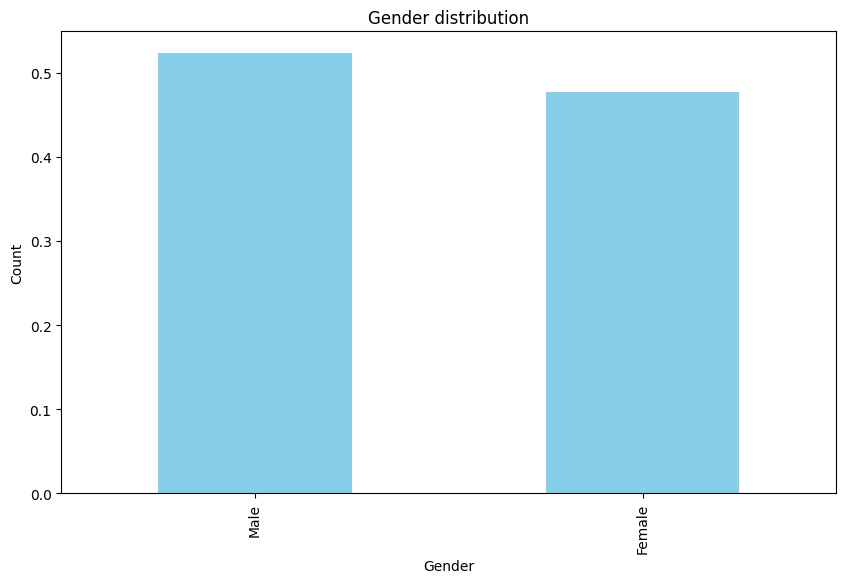

In [40]:
plt.figure(figsize=(10, 6))
total_data['Gender'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

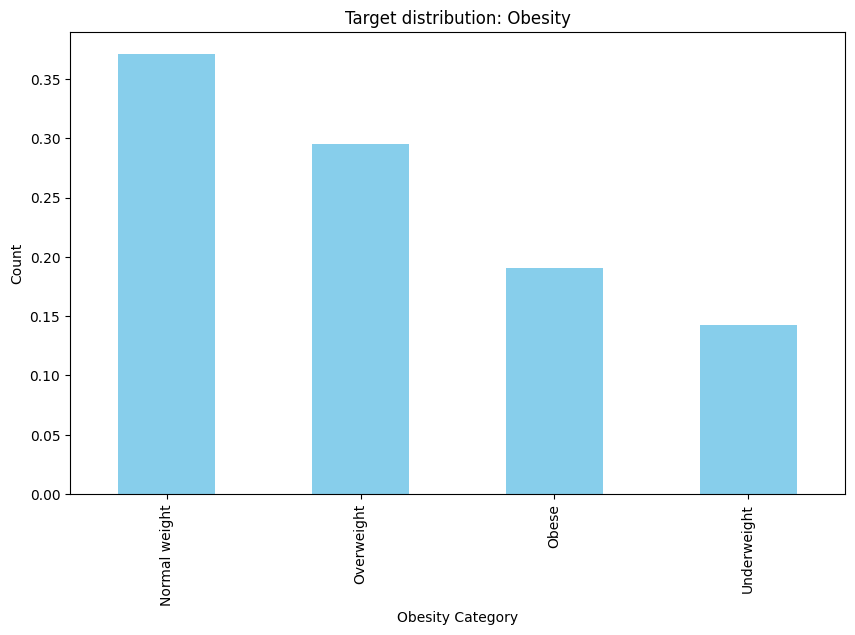

In [41]:
plt.figure(figsize=(10, 6))
total_data['ObesityCategory'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Target distribution: Obesity')
plt.xlabel('Obesity Category')
plt.ylabel('Count')
plt.show()

The analysis shows that all the numerical variables count with a normal distirbution. Regarding the gender variable, it has a small difference between male and female, which means that the data collected has taken gender bias into account. Finally, The target variable shows a distribution that can be consedered accurrate according to the american health-realted organisation, Trust for America's Health.

Information in the following link:
https://www.tfah.org/report-details/cerca-de-40-de-los-adultos-en-estados-unidos-son-obesos/#:~:text=Hoy%20en%20d%C3%ADa%2C%20cerca%20de,los%20menores%2C%20aument%C3%B3%2033%25.

---

## DESCRIPTIVE DATA ANALYSIS CONCLUSIONS

**Dataset Size:**
The dataset comprises 1000 entries and 7 columns, with 6 columns representing features, and the target variable labeled as 'ObesityCategory'.

**Data Type:**
Four predictive variables are numeric and two are categoric . The target variable 'ObesityCategory' is categorical, with four possible outcomes. This will be modified in the eda analysis.

**Missing Values:**
The dataset is complete, with no missing values observed across all entries. Each record contains comprehensive information for every column.

**Duplicates:**
No duplicate entries exist in the dataset; each row appears to be distinct.

**Data Distribution:**
The distribution of data in most variables appears to align with a normal distribution. However, the presence of '0' values may potentially impact the distribution, although it has not been definitively established that these values are erroneous.

**Outliers:**
The dataset includes entries with '0' values and statistically high values. However, it is essential to note that these values may not necessarily be incorrect.
